# SI 618 - Homework #6: Machine Learning 1

Version 2021.03.21.2.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: linear regression,
machine learning pipeline, agglomerative clustering, k-means clustering, and t-SNE.

We will be using [graduate admissions data](https://www.kaggle.com/mohansacharya/graduate-admissions).

This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'yjwoo' # fill this in with your uniqname
# Do not modify the next three lines
import numpy as np
MY_UNIQHASH = hash(MY_UNIQNAME) & 2**32-1
np.random.seed(MY_UNIQHASH)
print(f"Random seed set to {MY_UNIQHASH}")

Random seed set to 552365983


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from random import sample
import random

In [3]:
admit = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/Admission_Predict.csv',
                    index_col="Serial No.")

In [4]:
admit.shape

(400, 8)

In [5]:
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Task 1 (5 points):
Perform basic exploratory data analyses on the variables in this dataframe.  Your work should include both
numerical **and** graphical overviews of the data.  The `multiplePlots` code might be helpful here.

First, let's change column names to lowercase and delete space in column names for just convenience.

In [6]:
admit.columns = ["gre_score", "toefl_score", "univ_rate", "sop_power", "lor_power", "cgpa", "research_exp", "chance_of_admit"]
admit.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp,chance_of_admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gre_score        400 non-null    int64  
 1   toefl_score      400 non-null    int64  
 2   univ_rate        400 non-null    int64  
 3   sop_power        400 non-null    float64
 4   lor_power        400 non-null    float64
 5   cgpa             400 non-null    float64
 6   research_exp     400 non-null    int64  
 7   chance_of_admit  400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


There are no missing values in the data set.

In our data set, the dependent variable is chance_of_admit and other variables are independent variables. And independent variables can be categorized into 4 different types.
- Dependent variable: Chance of admit
- Independent variables:
    - Score related variables: GRE scores, TOEFL scores, Undergraduate GPA
    - Documen power related variables: Statement of purpose strength, Letter of recommendation strength
    - Research related variable: Research experience
    - Undergraduate quality related variable: University rating

## 1. Score related variables

### 1.1. GRE Scores

In [8]:
admit["gre_score"].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: gre_score, dtype: float64

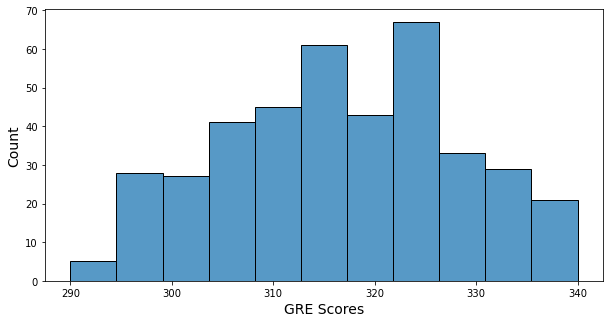

In [9]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "gre_score")
plt.xlabel("GRE Scores", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- Minimum of GRE score: 290   
- Maximum of GRE score: 340
- GRE score's histogram has a little bit of bell shape, and many GRE scores are in 315 ~ 325.

### 1.2. TOEFL Scores

In [10]:
admit["toefl_score"].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: toefl_score, dtype: float64

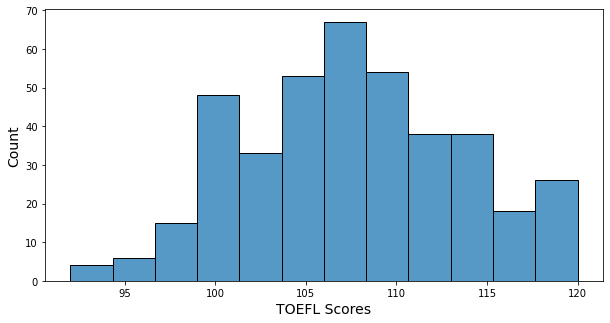

In [11]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "toefl_score")
plt.xlabel("TOEFL Scores", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- Minimum of TOEFL score: 92   
- Maximum of TOEFL score: 120
- TOEFL score's histogram has a little bit of a bell shape, and many TOEFL scores are in 105 ~ 110. Scores under 100 are very few. 

### 1.3. Undergraduate GPA

In [12]:
admit["cgpa"].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: cgpa, dtype: float64

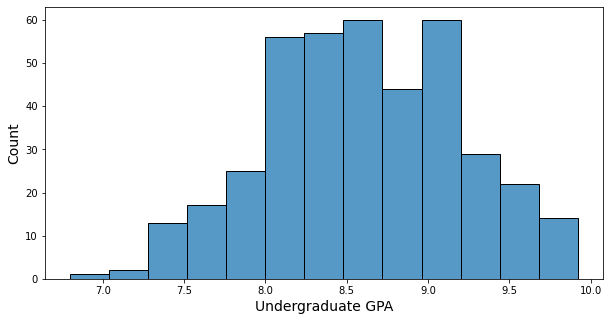

In [13]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "cgpa")
plt.xlabel("Undergraduate GPA", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- Minimum of GPA: 6.8   
- Maximum of GPA: 9.92
- GPA's histogram has somehow bell shape, and many GPAs are in 8.0 ~ 9.0.

## 2. Documen power related variables

### 2.1. SOP Strength

In [14]:
admit["sop_power"].value_counts()

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: sop_power, dtype: int64

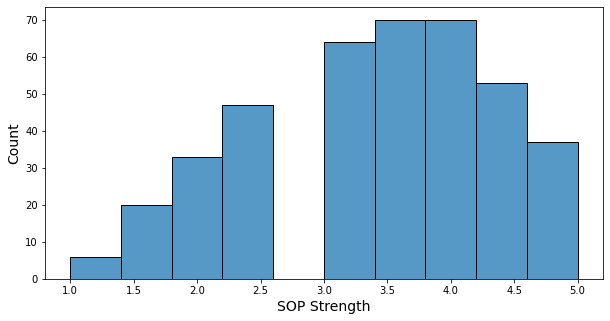

In [15]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "sop_power")
plt.xlabel("SOP Strength", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- The sop strength is a number between 1 and 5, in increments of 0.5.
- About two-thirds of students have a strength of 3 or higher.
- Only 6 students have a strength of 1.

### 2.2. Letter of Recommendation Strength

In [16]:
admit["lor_power"].value_counts()

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: lor_power, dtype: int64

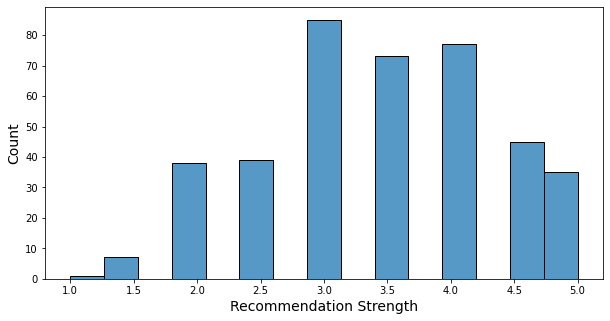

In [17]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "lor_power")
plt.xlabel("Recommendation Strength", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- The recommendation letter strength is a number between 1 and 5, in increments of 0.5.
- About two-thirds of students have a strength of 3 or higher.
- Only 8 students have a strength of less than 2.

## 3. Undergraduate quality related variable

### 3.1. University Rating

In [18]:
admit["univ_rate"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: univ_rate, dtype: int64

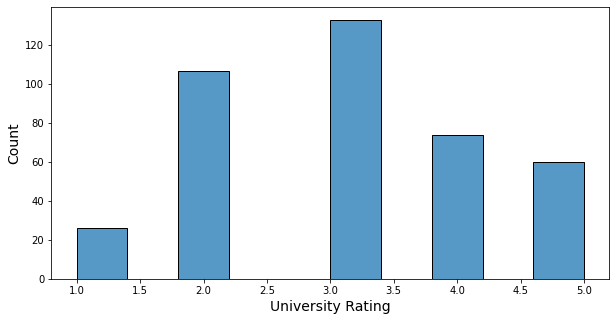

In [19]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "univ_rate")
plt.xlabel("University Rating", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- University rate is an integer from 1 to 5.
- 133 students are from rate 3 schools, which is the largest number with about 30%.
- 26 students are from rate 1 schools, which is the smallest number.

## 4. Research related variable

### 4.1. Research Experience

In [20]:
admit["research_exp"].value_counts()

1    219
0    181
Name: research_exp, dtype: int64

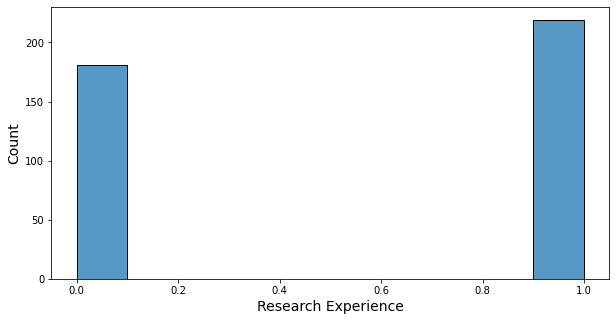

In [21]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "research_exp")
plt.xlabel("Research Experience", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- There are more students with research experience than students without research experience.

## 5. Dependent Variable: Chance of Admit

In [22]:
admit["chance_of_admit"].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: chance_of_admit, dtype: float64

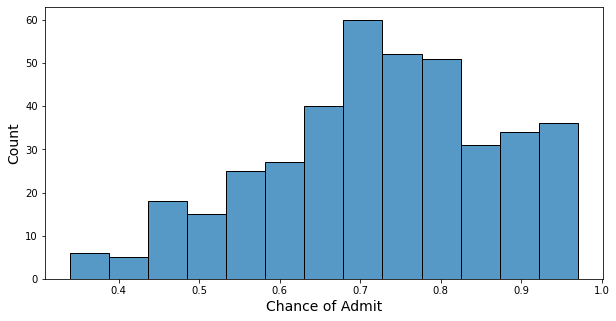

In [23]:
plt.figure(figsize = (10, 5))
sns.histplot(data = admit, x = "chance_of_admit")
plt.xlabel("Chance of Admit", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

- Minimum of chance: 0.34
- Maximum of chance: 0.97
- Mean of chance: 0.72
- Half of the students have a chance higher than 0.73

## 6. Correlation

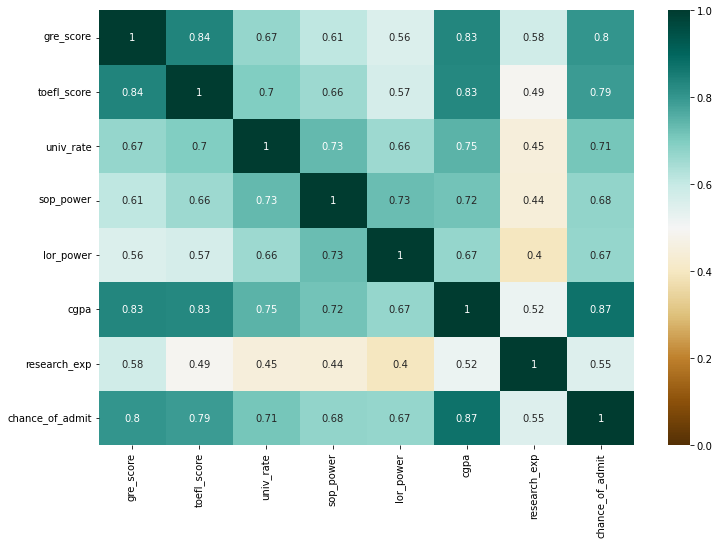

In [24]:
plt.figure(figsize = (12, 8))
sns.heatmap(admit.corr(), annot = True, vmin = 0, vmax = 1, cmap = 'BrBG');

- Top 3 variables that have a high correlation with the chance of admit: cgpa, gre_score, toefl_score.
- Score-related variables (gre_score, toefl_score, cgpa) have a high correlation with each other.
- Research experience seems to have the lowest impact on the chance of admit.

## 7. hypothesize

Let's make some hypotheses based on the four types of variables and check them out through data.

- Hypotheses1: Students with high school rates will have higher levels of score-related variables.
- Hypothesis2: Students with high school rates will have high document power.
- Hypothesis3: Students with higher school rates would have had more research experience.
- Hypothesis4: Students with research experience will have higher document power.
- Hypothesis5: Students with research experience will have good grades for score-related variables.

### 7.1. Hypothesis1: Students with high school rates will have higher levels of score-related variables.

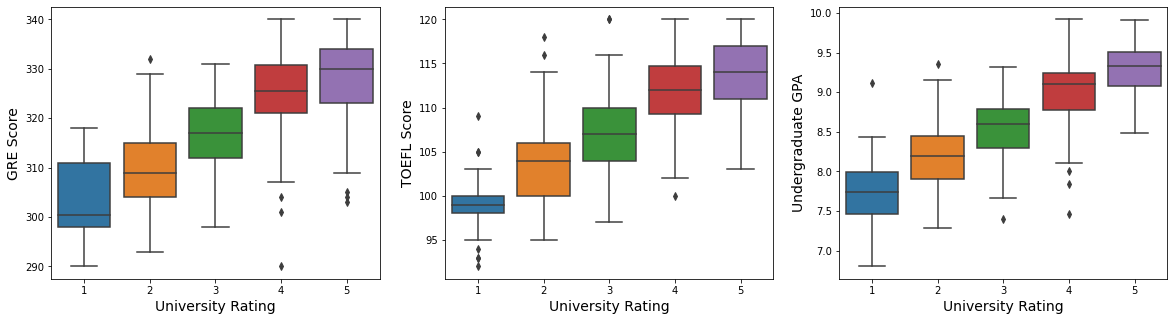

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
fontSize = 14

sns.boxplot(x = "univ_rate", y = "gre_score", data = admit, ax = ax[0])
ax[0].set_xlabel("University Rating", fontsize = fontSize)
ax[0].set_ylabel("GRE Score", fontsize = fontSize)

sns.boxplot(x = "univ_rate", y = "toefl_score", data = admit, ax = ax[1])
ax[1].set_xlabel("University Rating", fontsize = fontSize)
ax[1].set_ylabel("TOEFL Score", fontsize = fontSize)

sns.boxplot(x = "univ_rate", y = "cgpa", data = admit, ax = ax[2])
ax[2].set_xlabel("University Rating", fontsize = fontSize)
ax[2].set_ylabel("Undergraduate GPA", fontsize = fontSize)

plt.show()

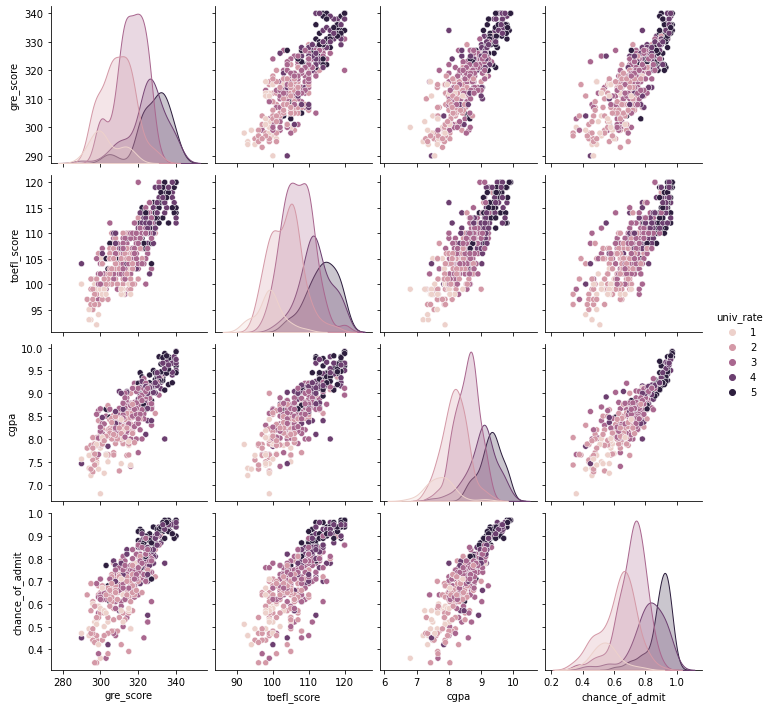

In [26]:
sns.pairplot(admit[["gre_score", "toefl_score", "cgpa", "chance_of_admit", "univ_rate"]], hue = "univ_rate")
plt.show()

- We can check that students from higher school rates tend to have higher scores in GRE, TOEFL, GPA.
- Scores(GRE, TOEFL, GPA) have a high linear relationship with the chance of admit.
- Scores have a high correlation with each other.

Also, the distribution of the chance of admit from different university rates shows that they have a high relationship. Let's check it with the box plot.

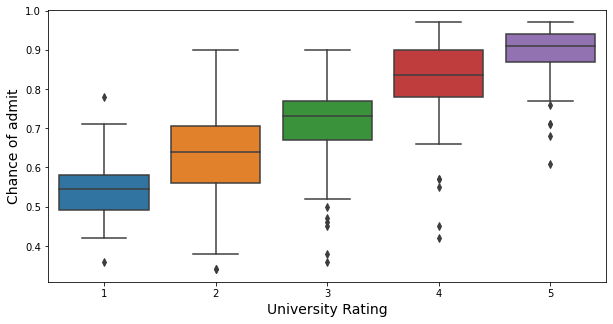

In [27]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "univ_rate", y = "chance_of_admit", data = admit)
plt.xlabel("University Rating", fontsize = 14)
plt.ylabel("Chance of admit", fontsize = 14)
plt.show()

As shown in the box plot, students from higher university rates tend to have a higher chance of admit.

### 7.2. Hypothesis2: Students with high school rates will have high document power.

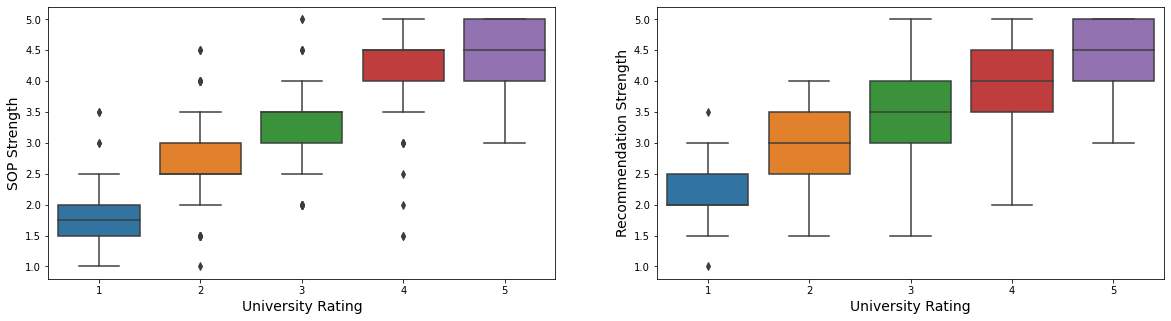

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fontSize = 14

sns.boxplot(x = "univ_rate", y = "sop_power", data = admit, ax = ax[0])
ax[0].set_xlabel("University Rating", fontsize = fontSize)
ax[0].set_ylabel("SOP Strength", fontsize = fontSize)

sns.boxplot(x = "univ_rate", y = "lor_power", data = admit, ax = ax[1])
ax[1].set_xlabel("University Rating", fontsize = fontSize)
ax[1].set_ylabel("Recommendation Strength", fontsize = fontSize)

plt.show()

- Students from higher school rates tend to have higher strength in documents.

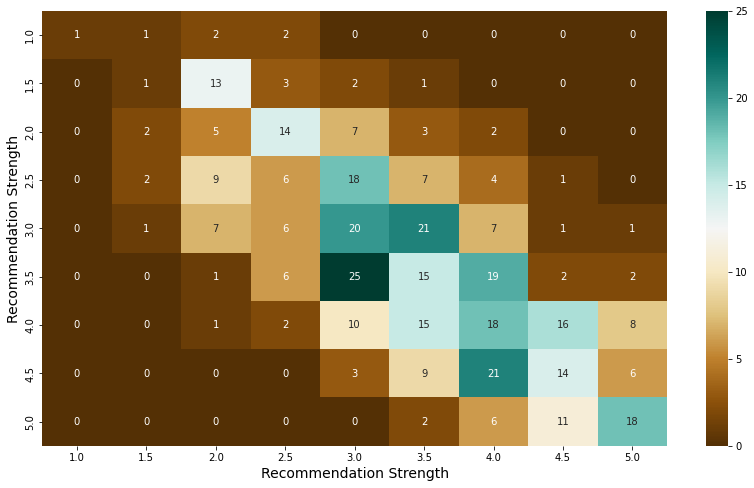

In [29]:
plt.figure(figsize = (14,8))
sns.heatmap(pd.crosstab(admit["sop_power"], admit["lor_power"]), cmap = 'BrBG', annot = True)
plt.xlabel("Recommendation Strength", fontsize = 14)
plt.ylabel("Recommendation Strength", fontsize = 14)
plt.show()

- Also, there are very few students who have high strength on only one of the SOP and recommendations, and most students have similar scores on both documents.

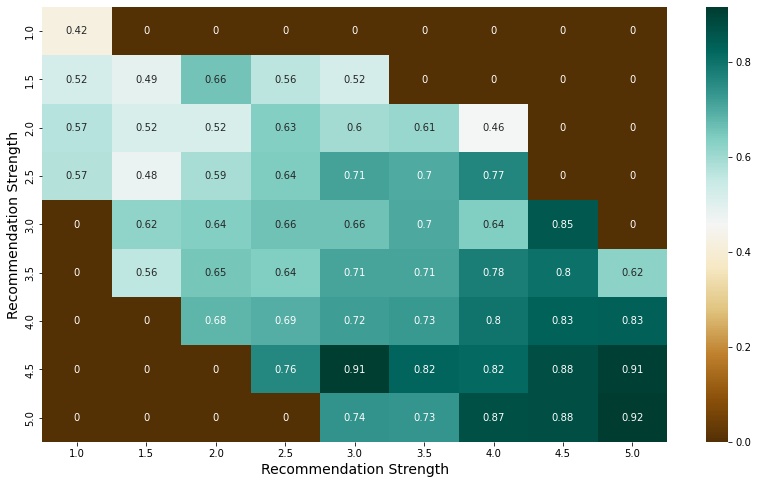

In [30]:
pt = pd.pivot_table(index = "lor_power", columns = "sop_power", values = "chance_of_admit", aggfunc = np.mean, fill_value = 0, data = admit)

plt.figure(figsize = (14,8))
sns.heatmap(pt, cmap = 'BrBG', annot = True)
plt.xlabel("Recommendation Strength", fontsize = 14)
plt.ylabel("Recommendation Strength", fontsize = 14)
plt.show()

- The higher the scores for both documents, the higher the average of the chance of admit, 0.8 or higher.

### 7.3. Hypothesis3: Students with higher school rates would have had more research experience.

In [31]:
univ_rate_research_exp = admit.groupby(["univ_rate", "research_exp"]).count().gre_score.unstack()
univ_rate_research_exp["total_students"] = univ_rate_research_exp[0] + univ_rate_research_exp[1]
univ_rate_research_exp.reset_index(inplace = True)
univ_rate_research_exp = univ_rate_research_exp.rename_axis(None, axis = 1)
univ_rate_research_exp

,univ_rate,0,1,total_students
0,1,21,5,26
1,2,75,32,107
2,3,62,71,133
3,4,15,59,74
4,5,8,52,60


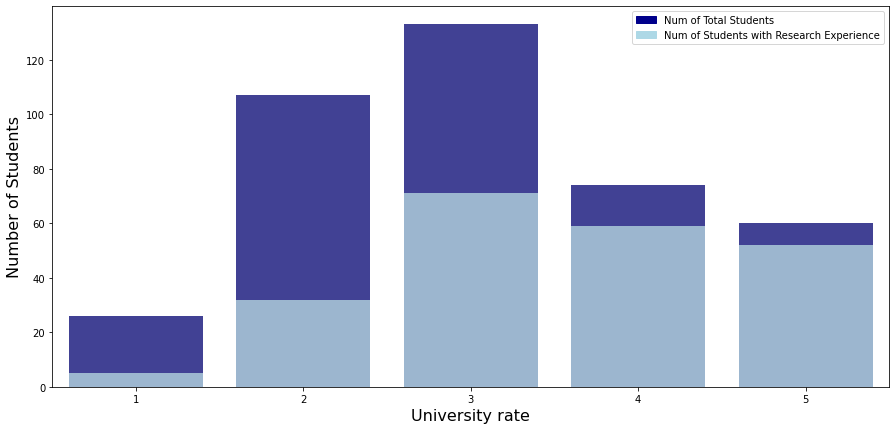

In [32]:
plt.figure(figsize = (15, 7))

# bar graph for total students
color = "darkblue"
ax1 = sns.barplot(x = "univ_rate", y = "total_students", color = color, alpha = 0.8, \
                  data = univ_rate_research_exp)
top_bar = mpatches.Patch(color = color, label = 'Num of Total Students')

# bar graph for students have research experience
color = "lightblue"
ax2 = sns.barplot(x = "univ_rate", y = 1,  color = color, alpha = 0.8, \
                  data = univ_rate_research_exp)
ax2.set_xlabel("University rate", fontsize = 16)
ax2.set_ylabel("Number of Students", fontsize = 16)
low_bar = mpatches.Patch(color = color, label = 'Num of Students with Research Experience')

plt.legend(handles=[top_bar, low_bar])
plt.show()

- As you can see, the higher the school's ranking, the higher the proportion of students with research experience.

Also, let's check the relationship between research experience and the chance of admit.

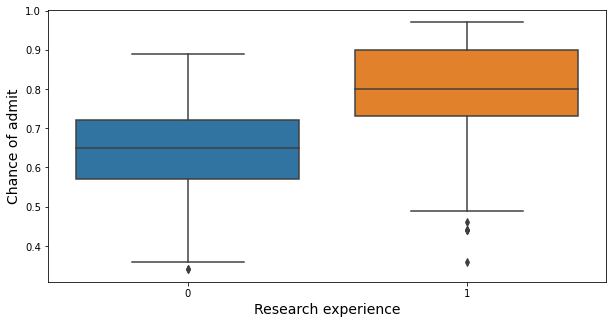

In [33]:
plt.figure(figsize = (10,5))

sns.boxplot(x = "research_exp", y = "chance_of_admit", data = admit)
plt.xlabel("Research experience", fontsize = 14)
plt.ylabel("Chance of admit", fontsize = 14)
plt.show()

- Students with research experience have a higher chance of admit than those without research experience.

### 7.4. Hypothesis4: Students with research experience will have higher document power.

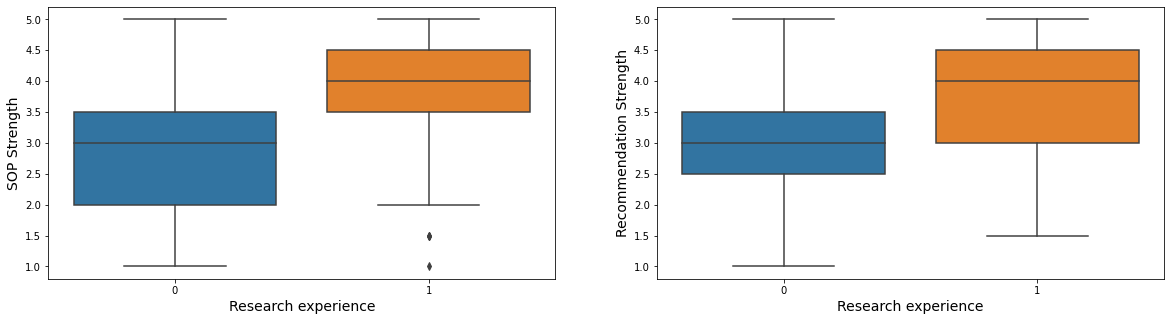

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fontSize = 14

sns.boxplot(x = "research_exp", y = "sop_power", data = admit, ax = ax[0])
ax[0].set_xlabel("Research experience", fontsize = fontSize)
ax[0].set_ylabel("SOP Strength", fontsize = fontSize)

sns.boxplot(x = "research_exp", y = "lor_power", data = admit, ax = ax[1])
ax[1].set_xlabel("Research experience", fontsize = fontSize)
ax[1].set_ylabel("Recommendation Strength", fontsize = fontSize)

plt.show()

- Students with research experience usually have a higher strength of sop and recommendation.

### 7.5. Hypothesis5: Students with research experience will have good grades for score-related variables.

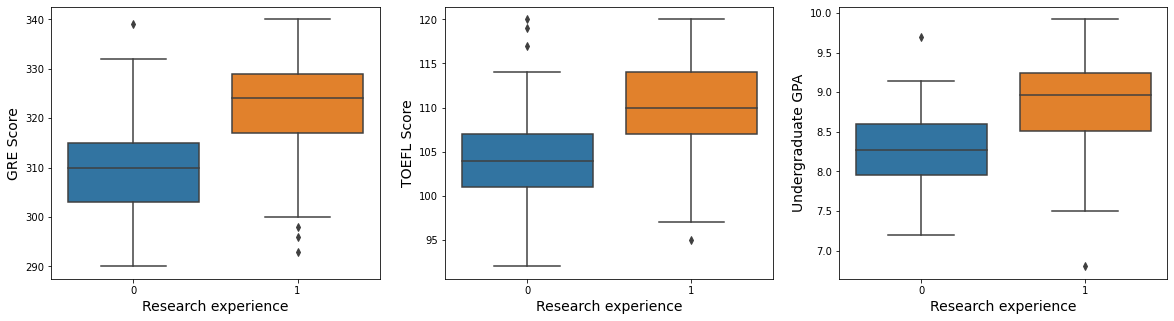

In [35]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
fontSize = 14

sns.boxplot(x = "research_exp", y = "gre_score", data = admit, ax = ax[0])
ax[0].set_xlabel("Research experience", fontsize = fontSize)
ax[0].set_ylabel("GRE Score", fontsize = fontSize)

sns.boxplot(x = "research_exp", y = "toefl_score", data = admit, ax = ax[1])
ax[1].set_xlabel("Research experience", fontsize = fontSize)
ax[1].set_ylabel("TOEFL Score", fontsize = fontSize)

sns.boxplot(x = "research_exp", y = "cgpa", data = admit, ax = ax[2])
ax[2].set_xlabel("Research experience", fontsize = fontSize)
ax[2].set_ylabel("Undergraduate GPA", fontsize = fontSize)

plt.show()

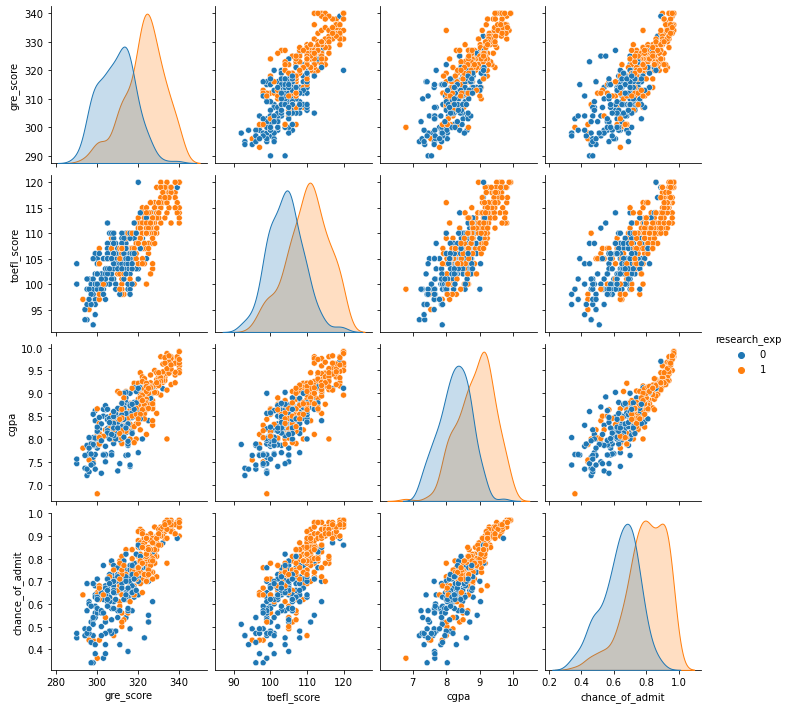

In [36]:
sns.pairplot(admit[["gre_score", "toefl_score", "cgpa", "chance_of_admit", "research_exp"]], hue = "research_exp")
plt.show()

- Students with research experience usually have higher GRE, TOEFL, and GPA scores

## Task 2a (15 points):
Use scikit-learn to conduct a linear regression that models the chance of admission based on the other variables.  Be sure to exclude "Serial No." as an explanatory variable.  Be sure to pre-process the data appropriately.  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.

Let's divide the data set into independent variables set (X) and dependent variable set (y)

In [37]:
X = admit.drop("chance_of_admit", axis = 1)
X

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [38]:
y = admit[["chance_of_admit"]]
y

,chance_of_admit
Serial No.,
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65
...,...
396,0.82
397,0.84
398,0.91


Since research experience has different characteristics from other numerical variables, let's proceed with the standard scale except for the research experience variable.

In [39]:
num_features = X.drop("research_exp", axis = 1).columns
nonnum_features = ["research_exp"]

In [40]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("nonnum", SimpleImputer(fill_value = 0), nonnum_features),
])

In [41]:
X_prep = full_pipeline.fit_transform(X)
X_prep

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  1.        ],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  1.        ],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  1.        ],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  1.        ],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584,  0.        ],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  1.        ]])

Now let's divide the data set into a train, test set with a ratio 80 : 20.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size = 0.2, random_state = MY_UNIQHASH)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320, 1), (80, 1))

Let's fit the regression model and get RMSE with cross-validate

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
result = cross_validate(lm, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 5)

In [46]:
-np.mean(result["test_score"]), np.std(result["test_score"])

(0.06571770989929313, 0.00942827238331732)

As a result of the cross-validate with k = 5, the mean of RMSE is 0.06 and std is 0.008.

Let's get RMSE in the test set.

In [47]:
test_prediction = lm.predict(X_test)

test_mse = mean_squared_error(y_test, test_prediction)
test_rmse = np.sqrt(test_mse)

In [48]:
test_rmse

0.060517186221347136

RMSE in the test set is 0.07. Since the chance of admit is a probability value between 0 ~ 1, and RMSE gives us an idea of the average distance between the observed data values and the predicted data values, RMSE 0.07 shows our model is pretty good.

Then let's visualize our prediction with actual values.

In [49]:
predict_result = pd.concat([y_test.reset_index().drop("Serial No.", axis = 1), pd.DataFrame(test_prediction.reshape(-1))], axis = 1) \
                 .rename({0 : "predict"}, axis = 1)

In [50]:
predict_result

,chance_of_admit,predict
0,0.63,0.732739
1,0.58,0.557091
2,0.79,0.779175
3,0.70,0.658570
4,0.75,0.717368
...,...,...
75,0.82,0.839223
76,0.85,0.834734
77,0.70,0.683501
78,0.94,0.935971


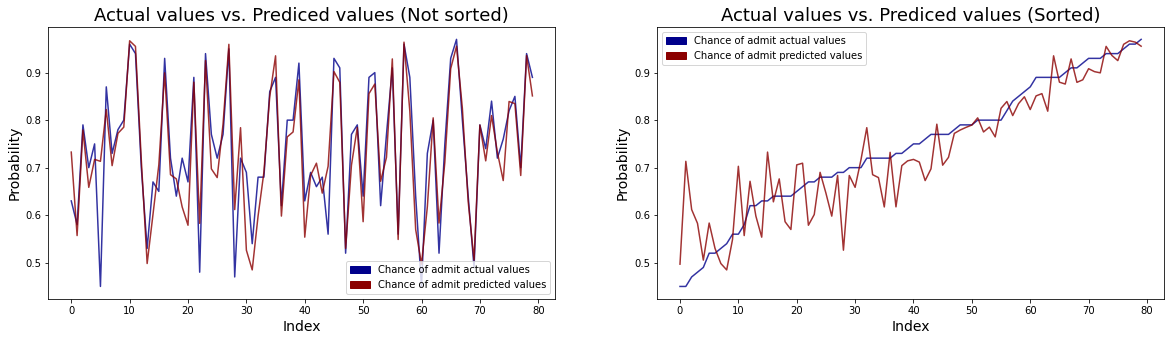

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
top_bar = mpatches.Patch(color = "darkblue", label = 'Chance of admit actual values')
low_bar = mpatches.Patch(color = "darkred", label = 'Chance of admit predicted values')

sns.lineplot(y = predict_result.chance_of_admit, x = predict_result.index, ax = ax[0], color = "darkblue", alpha = 0.8)
sns.lineplot(y = predict_result.predict, x = predict_result.index, ax = ax[0], color = "darkred", alpha = 0.8)
ax[0].set_xlabel("Index", fontsize = 14)
ax[0].set_ylabel("Probability", fontsize = 14)
ax[0].set_title("Actual values vs. Prediced values (Not sorted)", fontsize = 18)
ax[0].legend(handles=[top_bar, low_bar])

sns.lineplot(y = predict_result.sort_values("chance_of_admit").chance_of_admit, x = predict_result.index, ax = ax[1], color = "darkblue", alpha = 0.8)
sns.lineplot(y = predict_result.sort_values("chance_of_admit").predict, x = predict_result.index, ax = ax[1], color = "darkred", alpha = 0.8)
ax[1].set_xlabel("Index", fontsize = 14)
ax[1].set_ylabel("Probability", fontsize = 14)
ax[1].set_title("Actual values vs. Prediced values (Sorted)", fontsize = 18)
ax[1].legend(handles=[top_bar, low_bar])

plt.show()


- The left line plot shows actual values and predicted values for the chance of admit. We can see that the differences between real values and predicted values are very small.
- The right line plot shows the same plot but sorted actual values to check whether there is a difference in the accuracy of the prediction depending on the value of the chance of admit. We can see that that the higher the chance of admit, the smaller the difference between the actual value and the predicted value.

## Task 2b (5 points):
Based on your work in the previous task, what is the probability of admission for someone with a GRE score or 325, a TOEFL score of 108, a university rating of 3, an statement of purpose score of 3.0, a letter of recommendation score of 3.5, a high-school grade point average of 8.9, and who has research experience.

Let's fit a given person's information into the original data form.

In [52]:
someone = pd.DataFrame(np.array([325, 108, 3, 3.0, 3.5, 8.9, 1]).reshape(1, 7), columns = X.columns)
someone

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
0,325.0,108.0,3.0,3.0,3.5,8.9,1.0


In [53]:
someone_prep = full_pipeline.transform(someone)

In [54]:
lm.predict(someone_prep)

array([[0.78808193]])

Then this person's probability of admission is 0.79.

## Task 3 (5 points):
Decide on a reasonable value for a threshold for admission.  Pick a value that you would feel comfortable with if you wanted to know whether you were likely to be accepted into a graduate program.  Create a new variable called "admitted" that is set to 1 if the chance of admission value is equal to or greater than your chosen threshold, 0 otherwise.

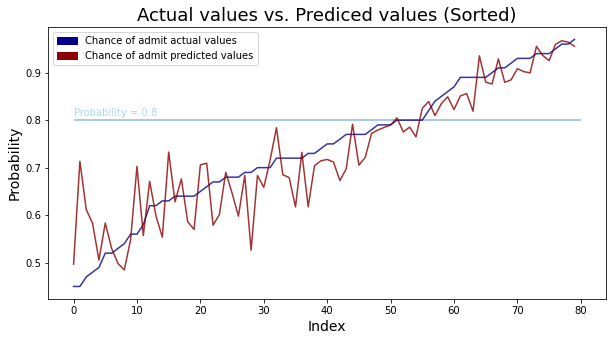

In [55]:
plt.figure(figsize = (10, 5))
top_bar = mpatches.Patch(color = "darkblue", label = 'Chance of admit actual values')
low_bar = mpatches.Patch(color = "darkred", label = 'Chance of admit predicted values')

sns.lineplot(y = predict_result.sort_values("chance_of_admit").chance_of_admit, x = predict_result.index, color = "darkblue", alpha = 0.8)
sns.lineplot(y = predict_result.sort_values("chance_of_admit").predict, x = predict_result.index, color = "darkred", alpha = 0.8)
plt.xlabel("Index", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Actual values vs. Prediced values (Sorted)", fontsize = 18)
plt.hlines(y = 0.8, xmin = 0, xmax = 80, alpha = 0.5)
plt.text(s = "Probability = 0.8", x = 0, y = 0.81, color = "lightblue")
plt.legend(handles=[top_bar, low_bar])

plt.show()


In the above result of the regression model, we have seen that the higher the chance of admit, the smaller the difference between the actual value and the predicted value. It means that the higher the probability, the more accurately the model can predict. If we set the threshold to about 0.8, the model prediction is quite accurate above 0.8, so let's set the threshold to 0.8.

In [56]:
admit.loc[admit.chance_of_admit >= 0.8, "admitted"] = 1
admit.loc[admit.chance_of_admit < 0.8, "admitted"] = 0

In [57]:
admit.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp,chance_of_admit,admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
2,324,107,4,4.0,4.5,8.87,1,0.76,0.0
3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [58]:
admit.shape

(400, 9)

In [59]:
admit.admitted.value_counts()

0.0    272
1.0    128
Name: admitted, dtype: int64

Then, admitted people is 128 and non-admitted people is 272

## Task 4 (20 points):
Using a random sample of approximately 40 rows from the original dataset, conduct an agglomerative clustering analysis using average linkage based on PCA projections of the original data onto 2 dimensions (remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first two principal components. 

Do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.

Create a dendrogram, pick an appropriate "cut line" and comment on the composition of each of the resulting clusters.  Comment on the degree to which the clusters correspond to admission probabilities (note: you may find it helpful to examine the values of "admitted").

Let's delete the chance of admit and admitted columns and get random samples of 40 rows.

In [60]:
X = admit.drop(["chance_of_admit", "admitted"], axis = 1)
X

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [61]:
random.seed(MY_UNIQHASH)
sample_index = sample(X.index.values.tolist(), 40)

In [62]:
X_sampled = X.loc[sample_index]
X_sampled.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
Serial No.,,,,,,,
133,309,105,5,3.5,3.5,8.56,0
152,332,116,5,5.0,5.0,9.28,1
337,319,110,3,3.0,2.5,8.79,0
41,308,110,3,3.5,3.0,8.00,1
345,295,96,2,1.5,2.0,7.34,0


First, let's do a PCA analysis of the original data in 2 dimensions.

In [63]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components = 2, random_state = MY_UNIQHASH)),
])

In [64]:
X_pca = pipe.fit_transform(X_sampled)

In [65]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.7450234 , 0.09677905])

Then 2 pca variables can explain almost 80% of the original variance.

Let's plot pca variables.

In [66]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

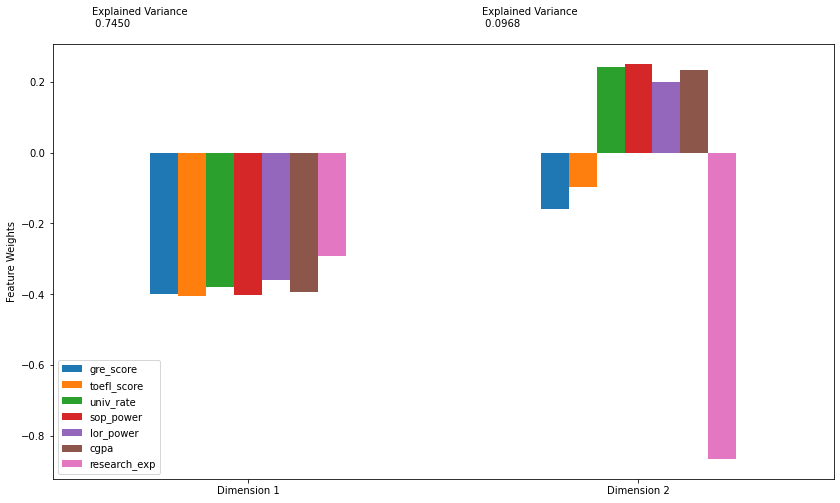

In [67]:
pca_results = pca_results(X_sampled, pipe.named_steps.pca)

Looking at the feature weights,
- PC1: The weights of all variables are negative, and among them, the weight of research experience has the smallest absolute value. So, if pc1 is small, it means that it has a high overall score in scores(GRE, TOEFL, GPA), documents power, school rates.
- PC2: The absolute value of research experience is absolutely large, about 0.9, and the weights of other variables are very small, with absolute values less than 0.2. So, if pc2 is small, it means that the student might have a research experience.

Let's check the meaning of PC2, by comparing research experience and the boolean value indicating whether PC2 is positive or negative.

In [68]:
research_exp_with_pc2 = pd.concat([pd.DataFrame(X_sampled.research_exp).reset_index().drop("Serial No.", axis = 1), 
                                   pd.DataFrame(X_pca[:, 1] < 0, columns = ["isNegativePc2"])], axis = 1)
research_exp_with_pc2

,research_exp,isNegativePc2
0,0,False
1,1,False
2,0,False
3,1,True
4,0,False
5,1,True
6,1,True
7,1,False
8,1,False
9,1,True


In [69]:
np.sum(research_exp_with_pc2.research_exp != research_exp_with_pc2.isNegativePc2)

9

Then we can see that except for 9, all of them had negative pc2 if they had research experience, and positive pc2 if they didn't. So, we can interpret PC2 as whether or not there is a research experience.

Now, let's draw a scatter plot of PC1, PC2.

In [70]:
loading = pipe.named_steps.pca.components_
loading_df = pd.DataFrame(loading.T, columns = ["PC1", "PC2"])
loading_df.index = X_sampled.columns

In [71]:
loading_df

,PC1,PC2
gre_score,-0.398393,-0.159363
toefl_score,-0.404557,-0.096621
univ_rate,-0.379784,0.241808
sop_power,-0.403113,0.251154
lor_power,-0.360675,0.198395
cgpa,-0.393507,0.233335
research_exp,-0.293168,-0.865975


In [72]:
def draw_PC_scatter(loading_df, x_pca):
    global data
    
    fig , ax1 = plt.subplots(figsize=(9,7))
    
    k1 = max(np.max(abs(pd.DataFrame(X_pca)))) + 0.5
    ax1.set_xlim(-k1, k1)
    ax1.set_ylim(-k1, k1)
    
    x_pca = pd.concat([pd.DataFrame(X_pca, columns = ["PC1", "PC2"]), 
                       pd.DataFrame(admit.loc[X_sampled.index, "admitted"]) \
                           .reset_index().drop("Serial No.", axis = 1)], axis = 1)
    sns.scatterplot(x = "PC1", y = "PC2", data = x_pca, hue = "admitted", ax = ax1)
        
    ax1.hlines(0, -k1 , k1, linestyles='dotted', colors='grey')
    ax1.vlines(0, -k1 , k1, linestyles='dotted', colors='grey')
    
    ax1.set_xlabel("PC1", fontsize = 14)
    ax1.set_ylabel("PC2", fontsize = 14)
    
    ax2 = ax1.twinx().twiny()
    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel('Principal Component loading vectors', color='red')
    
    k2 = 1.07
    
    for i in loading_df.index:
        ax2.annotate(i, (loading_df["PC1"][i]*k2, loading_df["PC2"][i]*k2), color='red')
        ax2.arrow(0,0, loading_df["PC1"][i], loading_df["PC2"][i])

    plt.show()

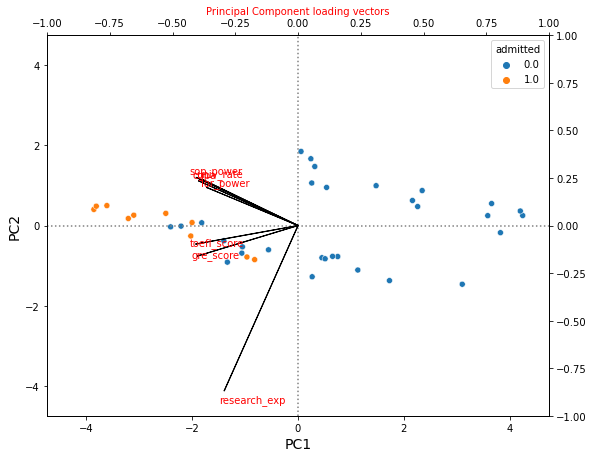

In [73]:
draw_PC_scatter(loading_df, X_pca)

Then since PC1 represents the overall strength of the student and PC2 represents the research experience, we can interpret PCA values by the following way:
- Low PC1, negative PC2: Students with overall high strenght, and with research experience
- Low PC1, positive PC2: Students with overall high strength, and without research experience
- High PC1, negative PC2: Students with overall low strength, and with research experience
- Low PC1, positive PC2: Students with overall low strength, and without research experience

If we interpret PCA values with admitted variable, then we can see that
- Students with overall high strength are admitted regardless of research experience.
- Students with overall low strength are not admitted regardless of rsearch experience.
- Among the students whose overall strengths are middle, some students are admitted among those who have research experience

Now, let's conduct an agglomerative clustering analysis with PCA values.

In [74]:
cluster = AgglomerativeClustering(n_clusters = 4)

In [75]:
y_pred = cluster.fit_predict(X_pca)

In [76]:
X_pca_with_cluster = pd.concat([pd.DataFrame(X_pca, columns = ["PC1", "PC2"]), pd.DataFrame(y_pred.astype(str), columns = ["predict_custer"])], axis = 1)
X_pca_with_cluster.head()

,PC1,PC2,predict_custer
0,0.056284,1.847931,1
1,-3.612705,0.497788,3
2,0.539610,0.950478,1
3,0.450760,-0.802875,0
4,4.245329,0.249916,2


In [77]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    threshold = kwargs.pop('color_threshold')
    plt.axhline(threshold,color='red')

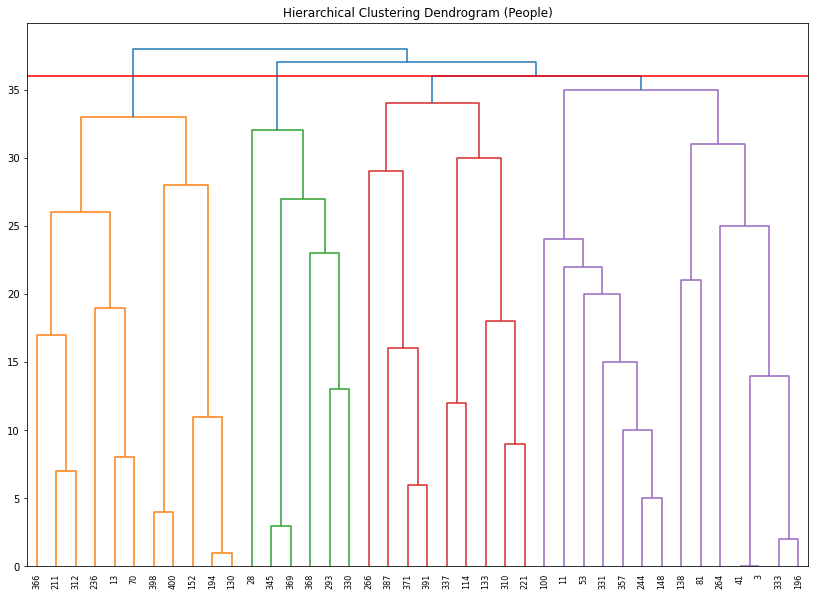

In [78]:
#model = AgglomerativeClustering(n_clusters=8)
#model = model.fit(music_nonames)
plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (People)')

plot_dendrogram(cluster, labels = X_sampled.index.values, color_threshold = 36)
#plt.axhline(57.5,c='red')
plt.xticks(rotation=90)
plt.show()

Then based on the above PCA results, we can divide students into 4 groups, which can be made by cut-line = 36. Let's see a scatter plot with predicted cluster and admitted value.

In [79]:
X_pca_with_cluster["admitted"] = admit.loc[X_sampled.index, "admitted"].astype(int).astype(str).values
X_pca_with_cluster.head()

,PC1,PC2,predict_custer,admitted
0,0.056284,1.847931,1,0
1,-3.612705,0.497788,3,1
2,0.539610,0.950478,1,0
3,0.450760,-0.802875,0,0
4,4.245329,0.249916,2,0


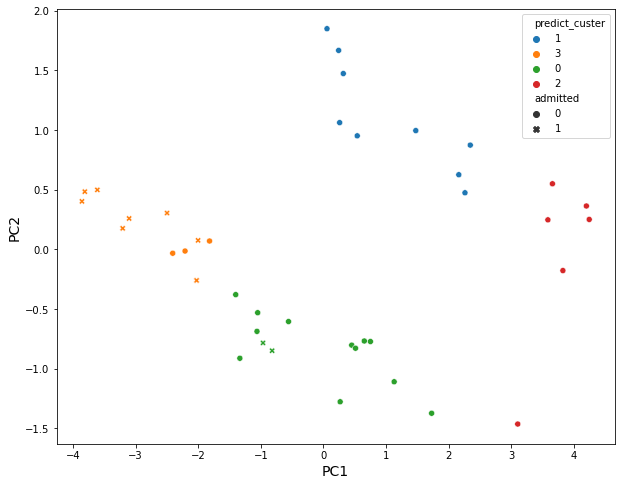

In [80]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = X_pca_with_cluster, x = "PC1", y = "PC2", hue = "predict_custer", style = "admitted")
plt.xlabel("PC1", fontsize = 14)
plt.ylabel("PC2", fontsize = 14)
plt.show()

Then 4 clusters divided by an agglomerative clustering analysis:
- Cluster3: Students have overall strength, in regardless of research experience
- Cluster1: Students have overall middle strength, without research experience
- Cluster0: Students have oveerall middle strength, with research experience
- Cluster2: Students have overall low strength, in regardless of research experience

Now, let's check each group's admitted rate.

In [81]:
hrch_cluster_admitted = X_pca_with_cluster.groupby(["predict_custer", "admitted"]).count().PC1.unstack().fillna(0)
hrch_cluster_admitted["total_students"] = hrch_cluster_admitted["0"] + hrch_cluster_admitted["1"]
hrch_cluster_admitted.reset_index(inplace = True)
hrch_cluster_admitted = hrch_cluster_admitted.rename_axis(None, axis = 1)
hrch_cluster_admitted

,predict_custer,0,1,total_students
0,0,12.0,2.0,14.0
1,1,9.0,0.0,9.0
2,2,6.0,0.0,6.0
3,3,3.0,8.0,11.0


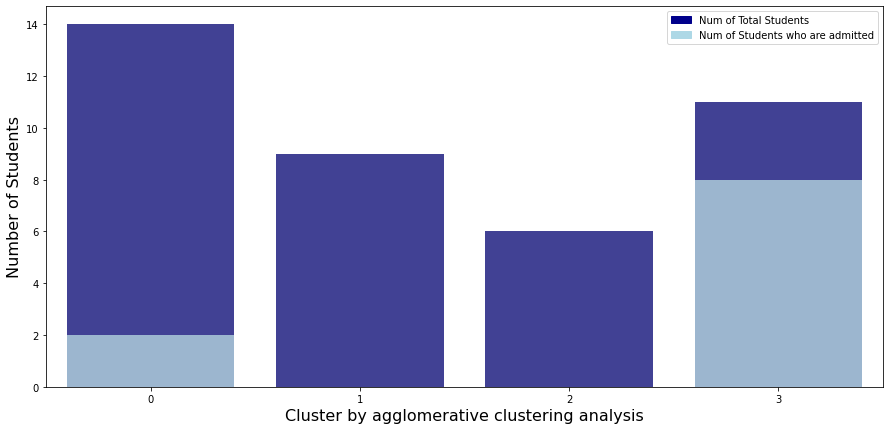

In [82]:
plt.figure(figsize = (15, 7))

# bar graph for total students
color = "darkblue"
ax1 = sns.barplot(x = "predict_custer", y = "total_students", color = color, alpha = 0.8, \
                  data = hrch_cluster_admitted)
top_bar = mpatches.Patch(color = color, label = 'Num of Total Students')

# bar graph for students being admitted
color = "lightblue"
ax2 = sns.barplot(x = "predict_custer", y = "1",  color = color, alpha = 0.8, \
                  data = hrch_cluster_admitted)
ax2.set_xlabel("Cluster by agglomerative clustering analysis", fontsize = 16)
ax2.set_ylabel("Number of Students", fontsize = 16)
low_bar = mpatches.Patch(color = color, label = 'Num of Students who are admitted')

plt.legend(handles=[top_bar, low_bar])
plt.show()

Let's check admitted rate of each cluster.
- Cluster3: Students have overall strength, in regardless of research experience
- Cluster1: Students have overall middle strength, without research experience
- Cluster0: Students have oveerall middle strength, with research experience
- Cluster2: Students have overall low strength, in regardless of research experience

As you can see, students belonging to cluster 3 have a good overall score regardless of their research experience, so the acceptance rate is about 70%, which is overwhelmingly higher than other clusters. Except for cluster 3, only cluster 0 has an admitted student. 
This is because students in cluster 0 have better overall scores and have research experience compared to students in other three clusters.

## Task 5 (20 points):
Conduct a k-means clustering of the complete admissions data.  Pre-process the data using a 2-dimensional PCA (remember to scale your data before doing the PCA).  Again, do not use the chance of admission or the "admitted" variable you created earlier.  Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the optimal number of clusters.

Let's delete "chance_of_admit" and "admitted" variables.

In [83]:
admit.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp,chance_of_admit,admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
2,324,107,4,4.0,4.5,8.87,1,0.76,0.0
3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [84]:
X = admit.drop(["chance_of_admit", "admitted"], axis = 1)
X.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


Let's do k-means clustering for the number of clusters in 2 ~ 5 after pre-processing the data using a 2-dimensional PCA.

For n_clusters = 2 The average silhouette_score is : 0.49198013506870547
For n_clusters = 3 The average silhouette_score is : 0.4176815718348474
For n_clusters = 4 The average silhouette_score is : 0.4343346421404948
For n_clusters = 5 The average silhouette_score is : 0.4315494177589814
For n_clusters = 6 The average silhouette_score is : 0.42692647003387135


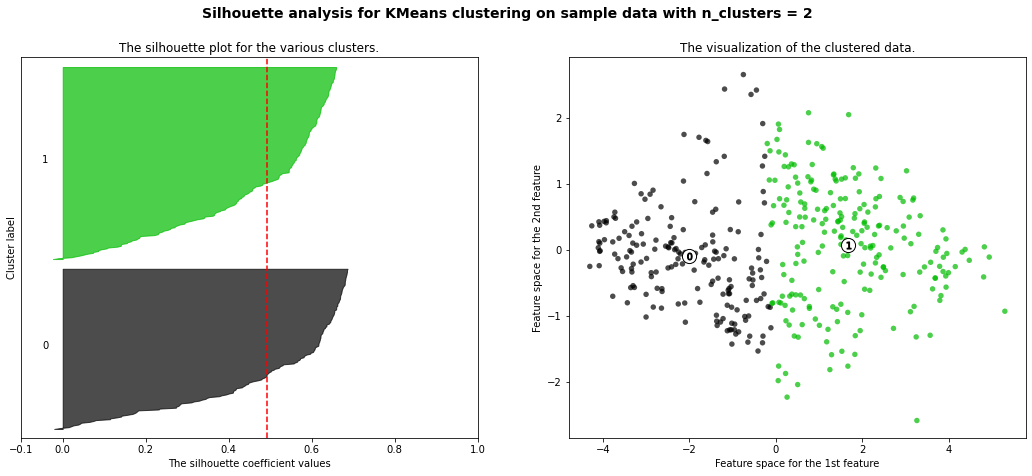

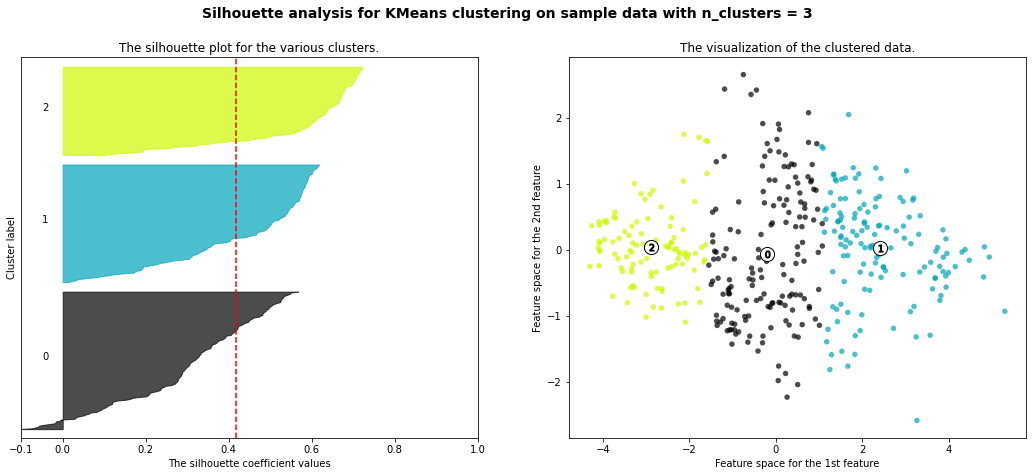

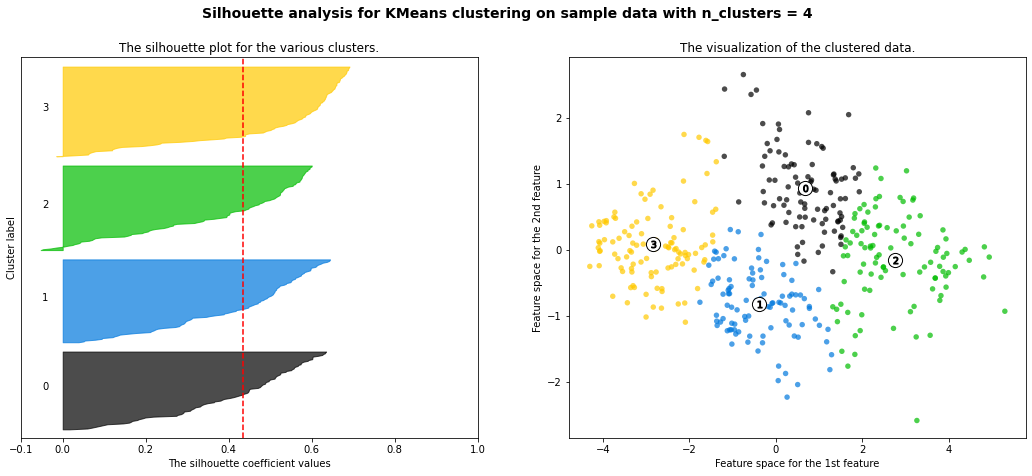

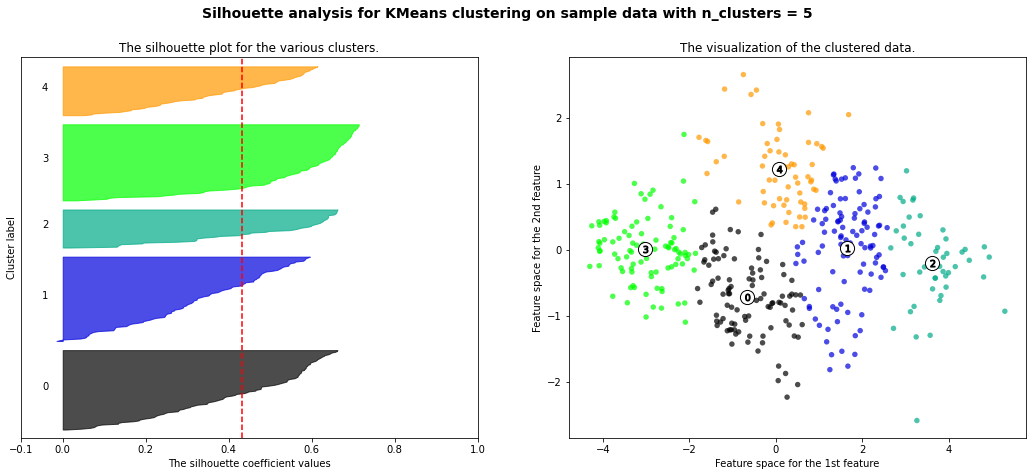

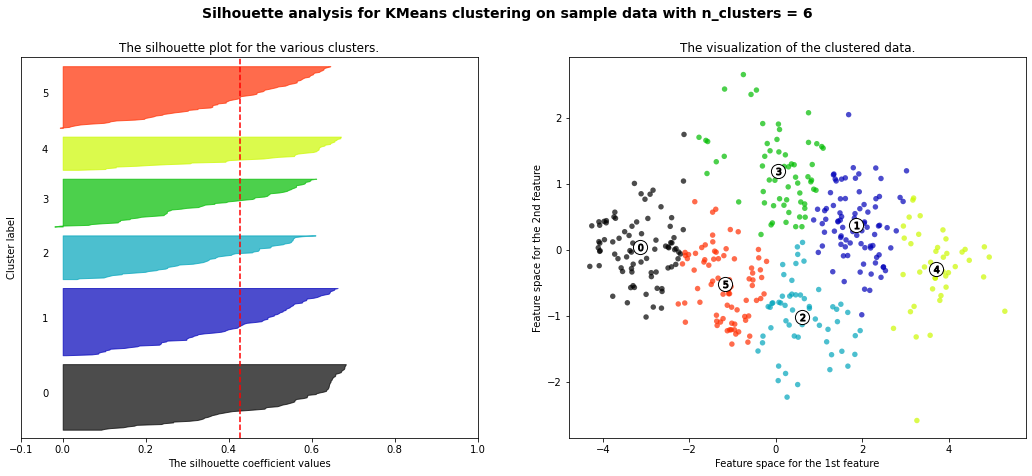

In [89]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    #cluster_labels = clusterer.fit_predict(X)

    pipe = Pipeline([
        ('scale',StandardScaler()),
        ('pca', PCA(n_components = 2, random_state = MY_UNIQHASH)),
    ])

    Xtransformed = pipe.fit_transform(X)

    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(Xtransformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xtransformed[:, 0], Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()

- 3 cluster: It is bad because more than 2/3 of elements in cluster 0 are below-average silhouette scores.
- 5 clusters: It is bad because more than 2/3 of elements in cluster 1 are below-average silhouette scores.
- 6 clusters: It is bad because more than half of elments in cluster 3 are below-average silhouette scores.
- Silhouette analysis is more ambivalent in deciding between 2 and 4.
- The average silhouette_score is higher in 2 clusters than in 4 clusters. But, based on PCA analysis, we can interpret the meaning of PC1 and PC2. So I prefer to have 4 clusters for a more detailed interpretation. In 4 clusters, the meaning of each cluster is similar to the meaning of each cluster from agglomerative clustering analysis:
    - Cluster3: Students have overall strength, in regardless of research experience
    - Cluster0: Students have overall middle strength, without research experience
    - Cluster1: Students have oveerall middle strength, with research experience
    - Cluster2: Students have overall low strength, in regardless of research experience

## Task 6 (10 points):
Show the results of a t-SNE analysis of the complete admissions data.  As before, do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.  Color the points in your visualization based on the "admitted" variable you created earlier.

Let's delete "chance_of_admit" and "admitted" variables.

In [90]:
X = admit.drop(["chance_of_admit", "admitted"], axis = 1)
X.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


Let's do a t-SNE analysis with perplexity in (1, 3, 5, 7, 9, 15).

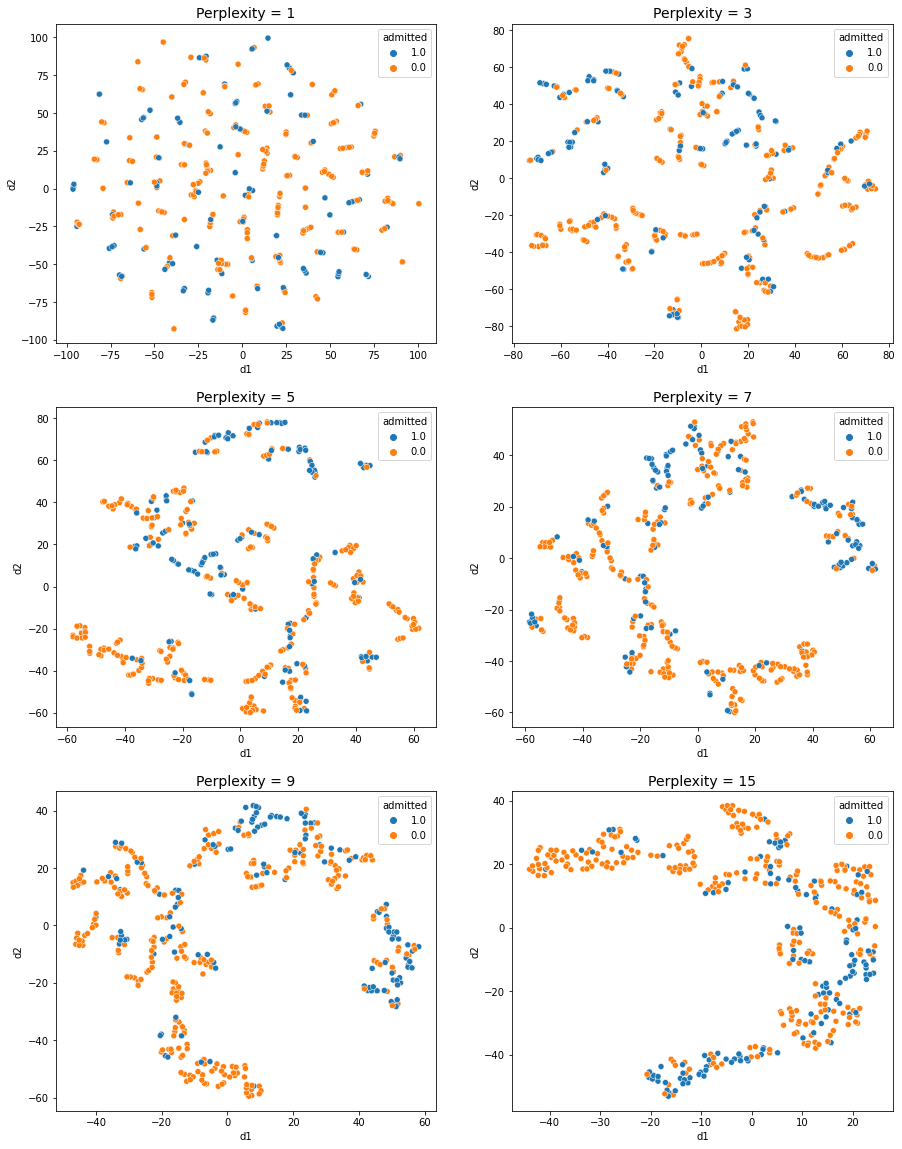

In [95]:
fig, ax = plt.subplots(3, 2, figsize = (15, 20))
for i, perplexity in enumerate([1, 3, 5, 7, 9, 15]):
    tsne = TSNE(n_components = 2, random_state = MY_UNIQHASH, perplexity = perplexity)
    X_2d = tsne.fit_transform(X)
    tsne_labelled = pd.concat([pd.DataFrame(X_2d, columns = ["d1", "d2"]), admit[["admitted"]].astype(str)], axis = 1)
    
    sns.scatterplot(data = tsne_labelled, x = "d1", y = "d2", hue = "admitted", ax = ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f"Perplexity = {perplexity}", fontsize = 14)

- In perplexity = 1, 3: It is hard to see any obvious groups in the scatter plot.
- In perplexity = 5 ~ 15: Three distinct groups can be identified.
    - 1 group: Almost every students are admitted
    - 2 group: Almost every stduents are not admitted
    - 3 group: Half of students are admitted and the other half of students are not admitted

Now, let's do PCA analysis first and do t-SNE analysis.

In [96]:
X = admit.drop(["chance_of_admit", "admitted"], axis = 1)
X.head()

,gre_score,toefl_score,univ_rate,sop_power,lor_power,cgpa,research_exp
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [97]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components = 2, random_state = MY_UNIQHASH)),
])
X_pca = pipe.fit_transform(X)

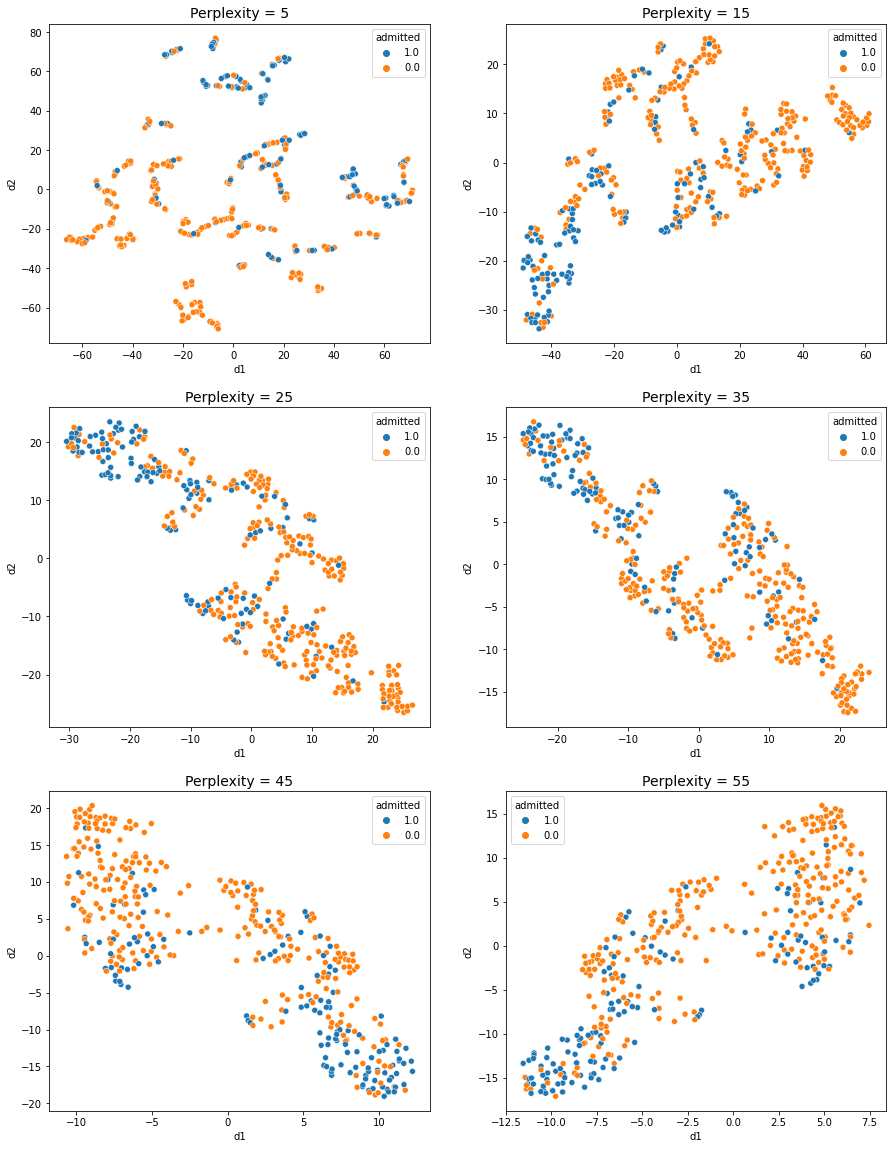

In [98]:
fig, ax = plt.subplots(3, 2, figsize = (15, 20))
for i, perplexity in enumerate([5, 15, 25, 35, 45, 55]):
    tsne = TSNE(n_components = 2, random_state = MY_UNIQHASH, perplexity = perplexity)
    X_2d = tsne.fit_transform(X_pca)
    tsne_labelled = pd.concat([pd.DataFrame(X_2d, columns = ["d1", "d2"]), admit[["admitted"]].astype(str)], axis = 1)
    
    sns.scatterplot(data = tsne_labelled, x = "d1", y = "d2", hue = "admitted", ax = ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f"Perplexity = {perplexity}", fontsize = 14)

- In perplexity = 5: It is hard to see any obvious groups in the scatter plot
- In perplexity = 15 ~ 55: Two or three distinct groups can be identified.

The results are quite similar, but it seems that the 3 groups are more clearly divided when PCA is not performed.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.